In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

dataset_path = '/content/drive/MyDrive/Colab Notebooks/dataset'

# Check if the directory exists
if os.path.exists(dataset_path):
    print(f"Contents of '{dataset_path}':")
    for item in os.listdir(dataset_path):
        print(item)
else:
    print(f"The directory '{dataset_path}' does not exist. Please check the path.")

Contents of '/content/drive/MyDrive/Colab Notebooks/dataset':
CFUs.csv
Aggregation.csv
Resistance.csv
readme.txt
Extrahost_survival.csv
Growth.csv
Growth_curves.csv
Cation_supplementation.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_Aggregation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/Aggregation.csv', sep=',')

In [ ]:
display(df_Aggregation.head())

,Time_min,Media,Replicate,OD
0,0,LB,A,0.2011
1,0,Bile,A,0.2312
2,0,SDS,A,0.1914
3,0,LB,B,0.1910
4,0,Bile,B,0.2492


**Análisis ANOVA de una vía por punto de tiempo y prueba post-hoc de Tukey.**


Realizaremos un ANOVA de una vía para cada Time_min para evaluar el efecto del tipo de medio (Media) en la densidad óptica (OD). Si el ANOVA es significativo para un Time_min dado, realizaremos una prueba post-hoc de Tukey para comparaciones pareadas entre los grupos de Media.

In [ ]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

unique_times = sorted(df_Aggregation['Time_min'].unique())

print("--- Resultados del ANOVA de una vía por Tiempo ---")
for time in unique_times:
    df_subset = df_Aggregation[df_Aggregation['Time_min'] == time]

    # Extraer los datos de OD para cada grupo de Media
    groups = [df_subset['OD'][df_subset['Media'] == m] for m in df_subset['Media'].unique()]

    # Realizar ANOVA de una vía
    f_stat, p_value = f_oneway(*groups)

    print(f"\nTime_min: {time} min")
    print(f"  F-statistic: {f_stat:.3f}, p-value: {p_value:.3e}")

    if p_value < 0.05:
        print(f"  ANOVA significativo (p < 0.05). Realizando prueba de Tukey:")
        # Realizar prueba post-hoc de Tukey
        tukey_result = pairwise_tukeyhsd(endog=df_subset['OD'],
                                       groups=df_subset['Media'],
                                       alpha=0.05)
        display(tukey_result.summary())
    else:
        print(f"  ANOVA no significativo (p >= 0.05).")

--- Resultados del ANOVA de una vía por Tiempo ---

Time_min: 0 min
  F-statistic: 21.669, p-value: 1.798e-03
  ANOVA significativo (p < 0.05). Realizando prueba de Tukey:


group1,group2,meandiff,p-adj,lower,upper,reject
Bile,LB,-0.0441,0.0022,-0.0664,-0.0217,True
Bile,SDS,-0.0385,0.0045,-0.0609,-0.0161,True
LB,SDS,0.0056,0.7372,-0.0168,0.0279,False



Time_min: 32 min
  F-statistic: 20.847, p-value: 1.991e-03
  ANOVA significativo (p < 0.05). Realizando prueba de Tukey:


group1,group2,meandiff,p-adj,lower,upper,reject
Bile,LB,-0.0566,0.002,-0.0849,-0.0284,True
Bile,SDS,-0.0438,0.0074,-0.072,-0.0156,True
LB,SDS,0.0128,0.4007,-0.0154,0.0411,False



Time_min: 91 min
  F-statistic: 16.585, p-value: 3.594e-03
  ANOVA significativo (p < 0.05). Realizando prueba de Tukey:


group1,group2,meandiff,p-adj,lower,upper,reject
Bile,LB,-0.0925,0.0032,-0.1427,-0.0423,True
Bile,SDS,-0.0304,0.2303,-0.0807,0.0198,False
LB,SDS,0.0621,0.0212,0.0118,0.1123,True



Time_min: 158 min
  F-statistic: 17.331, p-value: 3.213e-03
  ANOVA significativo (p < 0.05). Realizando prueba de Tukey:


group1,group2,meandiff,p-adj,lower,upper,reject
Bile,LB,-0.1155,0.005,-0.1842,-0.0468,True
Bile,SDS,-0.0028,0.9916,-0.0715,0.0659,False
LB,SDS,0.1127,0.0057,0.044,0.1814,True



Time_min: 220 min
  F-statistic: 16.793, p-value: 3.482e-03
  ANOVA significativo (p < 0.05). Realizando prueba de Tukey:


group1,group2,meandiff,p-adj,lower,upper,reject
Bile,LB,-0.073,0.0239,-0.1337,-0.0122,True
Bile,SDS,0.0402,0.1854,-0.0205,0.101,False
LB,SDS,0.1132,0.003,0.0524,0.174,True



Time_min: 262 min
  F-statistic: 21.028, p-value: 1.946e-03
  ANOVA significativo (p < 0.05). Realizando prueba de Tukey:


group1,group2,meandiff,p-adj,lower,upper,reject
Bile,LB,-0.0572,0.0346,-0.1093,-0.0051,True
Bile,SDS,0.0528,0.0474,0.0007,0.1049,True
LB,SDS,0.1101,0.0016,0.058,0.1622,True



Time_min: 294 min
  F-statistic: 27.302, p-value: 9.704e-04
  ANOVA significativo (p < 0.05). Realizando prueba de Tukey:


group1,group2,meandiff,p-adj,lower,upper,reject
Bile,LB,-0.0426,0.0639,-0.0881,0.0029,False
Bile,SDS,0.0662,0.0102,0.0207,0.1117,True
LB,SDS,0.1088,0.0008,0.0633,0.1543,True



Time_min: 331 min
  F-statistic: 25.393, p-value: 1.180e-03
  ANOVA significativo (p < 0.05). Realizando prueba de Tukey:


group1,group2,meandiff,p-adj,lower,upper,reject
Bile,LB,-0.0282,0.288,-0.0797,0.0234,False
Bile,SDS,0.0867,0.005,0.0351,0.1382,True
LB,SDS,0.1148,0.0012,0.0633,0.1664,True


**Gráficos de Línea para visualizar las tendencias**

Los siguientes gráficos de línea muestran la evolución de la Densidad Óptica (OD) a lo largo del tiempo para cada tipo de medio, lo que ayuda a visualizar las diferencias que el ANOVA y la prueba de Tukey han investigado.

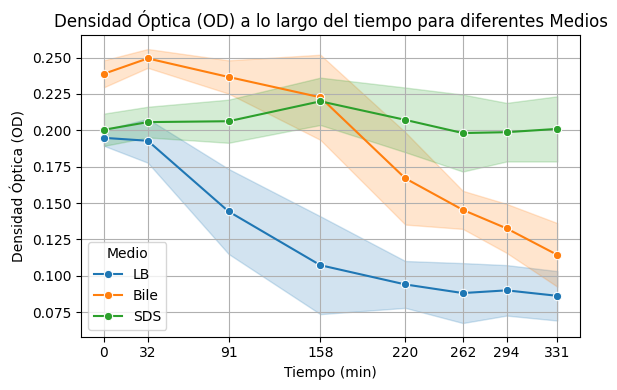

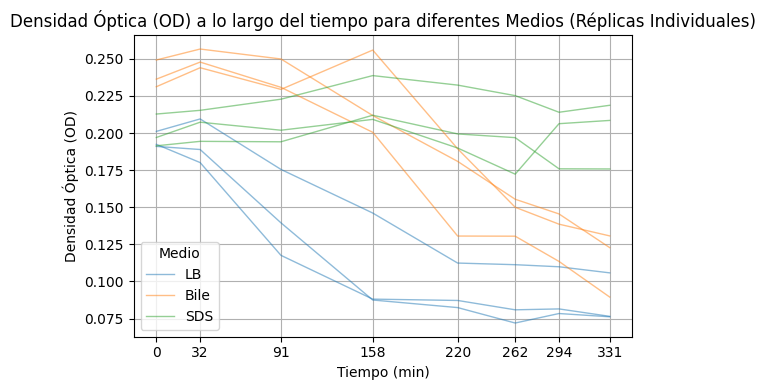

In [ ]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=df_Aggregation, x='Time_min', y='OD', hue='Media', marker='o', errorbar='sd')
plt.title('Densidad Óptica (OD) a lo largo del tiempo para diferentes Medios')
plt.xlabel('Tiempo (min)')
plt.ylabel('Densidad Óptica (OD)')
plt.grid(True)
plt.legend(title='Medio')
plt.xticks(sorted(df_Aggregation['Time_min'].unique()))
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.lineplot(data=df_Aggregation, x='Time_min', y='OD', hue='Media', units='Replicate', estimator=None, lw=1, alpha=0.5)
plt.title('Densidad Óptica (OD) a lo largo del tiempo para diferentes Medios (Réplicas Individuales)')
plt.xlabel('Tiempo (min)')
plt.ylabel('Densidad Óptica (OD)')
plt.grid(True)
plt.legend(title='Medio')
plt.xticks(sorted(df_Aggregation['Time_min'].unique()))
plt.tight_layout()
plt.show()

**Gráficos de Línea Individuales por Tipo de Medio**

A continuación, se muestran tres gráficos de línea separados, cada uno representando la evolución de la Densidad Óptica (OD) a lo largo del tiempo para cada tipo de medio especificado: LB, Bile y SDS. Esto permite una visualización más clara de las tendencias individuales de cada tratamiento.

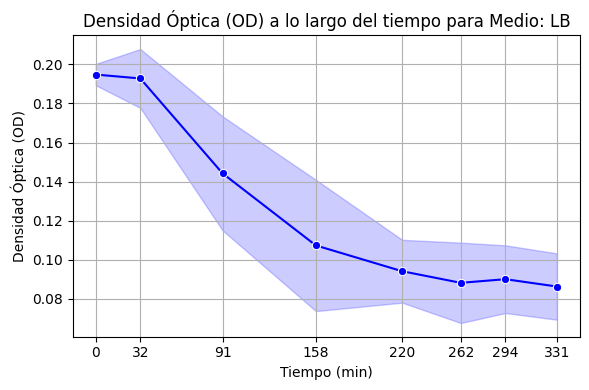

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Gráfico para el medio LB
plt.figure(figsize=(6, 4))
sns.lineplot(data=df_Aggregation[df_Aggregation['Media'] == 'LB'], x='Time_min', y='OD', marker='o', errorbar='sd', color='blue')
plt.title('Densidad Óptica (OD) a lo largo del tiempo para Medio: LB')
plt.xlabel('Tiempo (min)')
plt.ylabel('Densidad Óptica (OD)')
plt.grid(True)
plt.xticks(sorted(df_Aggregation['Time_min'].unique()))
plt.tight_layout()
plt.show()

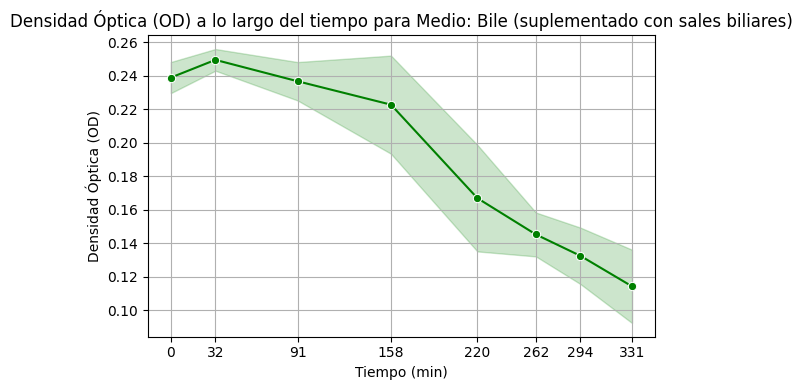

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Gráfico para el medio Bile
plt.figure(figsize=(6, 4))
sns.lineplot(data=df_Aggregation[df_Aggregation['Media'] == 'Bile'], x='Time_min', y='OD', marker='o', errorbar='sd', color='green')
plt.title('Densidad Óptica (OD) a lo largo del tiempo para Medio: Bile (suplementado con sales biliares)')
plt.xlabel('Tiempo (min)')
plt.ylabel('Densidad Óptica (OD)')
plt.grid(True)
plt.xticks(sorted(df_Aggregation['Time_min'].unique()))
plt.tight_layout()
plt.show()

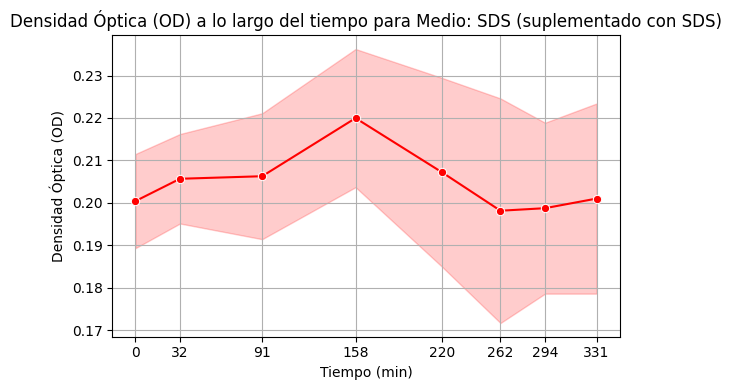

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Gráfico para el medio SDS
plt.figure(figsize=(6, 4))
sns.lineplot(data=df_Aggregation[df_Aggregation['Media'] == 'SDS'], x='Time_min', y='OD', marker='o', errorbar='sd', color='red')
plt.title('Densidad Óptica (OD) a lo largo del tiempo para Medio: SDS (suplementado con SDS)')
plt.xlabel('Tiempo (min)')
plt.ylabel('Densidad Óptica (OD)')
plt.grid(True)
plt.xticks(sorted(df_Aggregation['Time_min'].unique()))
plt.tight_layout()
plt.show()

# Task
The F-statistic and p-value for the ANOVA of OD change at `Time_min = 158 min` are F(2,6) = 17.331 and p-value = 3.213e-03.

## Extract ANOVA Results for 158 min

### Subtask:
Perform ANOVA on 'OD_change' for each time point and extract the F-statistic and p-value for Time_min = 158 min.


**Reasoning**:
The subtask requires performing ANOVA on the 'OD_change' column for each time point, specifically extracting and printing the F-statistic and p-value for 'Time_min = 158 min', and generating a DataFrame with the ANOVA results. This involves iterating through unique time points, subsetting the data, performing ANOVA, collecting results, and then filtering and printing the specific result.



In [ ]:
from scipy.stats import f_oneway
import pandas as pd

# 1. Get the unique time points from df_merged where Time_min is greater than 0.
# The Time_min column in df_merged already exists and the first Time_min (0) is when OD_change is 0.
# We are interested in changes from time 0, so we should consider all time points.
# Based on the problem description, `OD_change` is calculated relative to initial time 0, so ANOVA should be performed for all time points including 0 to evaluate the change from the start.
# However, the instruction states "where Time_min is greater than 0". Let's follow that. If 0 is included, it would be trivial as OD_change is 0 for all groups at time 0.
unique_times_for_change = sorted(df_merged[df_merged['Time_min'] > 0]['Time_min'].unique())

# 2. Initialize an empty list called anova_results_change_list.
anova_results_change_list = []

# 3. Iterate through each time in unique_times_for_change:
for time in unique_times_for_change:
    # a. Create a subset of df_merged for the current time, storing it in df_subset_change.
    df_subset_change = df_merged[df_merged['Time_min'] == time]

    # b. Create a list of OD_change values for each unique Media type within df_subset_change.
    groups_for_anova = [df_subset_change['OD_change'][df_subset_change['Media'] == m] for m in df_subset_change['Media'].unique()]

    # c. Perform a one-way ANOVA using scipy.stats.f_oneway on these OD_change groups.
    f_stat_change, p_value_change = f_oneway(*groups_for_anova)

    # d. Append a dictionary containing 'Time_min', 'F-statistic', and 'p-value' to anova_results_change_list.
    anova_results_change_list.append({
        'Time_min': time,
        'F-statistic': f_stat_change,
        'p-value': p_value_change
    })

# 4. Convert anova_results_change_list into a pandas DataFrame named df_anova_results_change.
df_anova_results_change = pd.DataFrame(anova_results_change_list)

# 5. Filter df_anova_results_change to find the row where Time_min is 158.
result_158_min = df_anova_results_change[df_anova_results_change['Time_min'] == 158]

# 6. Print the 'Time_min', 'F-statistic', and 'p-value' for this filtered row.
if not result_158_min.empty:
    print(f"\nANOVA Results for Time_min = 158 min (OD_change):")
    print(f"  Time_min: {result_158_min['Time_min'].iloc[0]}")
    print(f"  F-statistic: {result_158_min['F-statistic'].iloc[0]:.3f}")
    print(f"  p-value: {result_158_min['p-value'].iloc[0]:.3e}")
else:
    print("No ANOVA results found for Time_min = 158 min.")



ANOVA Results for Time_min = 158 min (OD_change):
  Time_min: 158
  F-statistic: 12.771
  p-value: 6.883e-03
